In [ ]:
from pathlib import Path

import os
import sys

current_path = Path(os.getcwd())
sys.path.append(str(current_path))

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
import vectorian

from vectorian.importers import NovelImporter
from vectorian.embeddings import FastText
from vectorian.session import LabSession

embedding = FastText("en")

im = NovelImporter(nlp)
doc = im("/Users/arbeit/A Child's Dream of a Star.txt")

session = LabSession(
    [doc],
    [embedding])

100%|██████████| 58/58 [00:00<00:00, 113.68it/s]


In [4]:
query = nlp("literal")
r = session.find(query, n=3)

FloatProgress(value=0.0, layout=Layout(width='100%'), max=1.0)

In [8]:
r

In [2]:
from vectorian.embeddings import Glove
glove = Glove()

In [6]:
from vectorian.importers import NovelImporter
from vectorian.session import LabSession

im = NovelImporter(nlp)
doc = im("/Users/arbeit/A Child's Dream of a Star.txt")

session = LabSession(
    [doc],
    [glove])

100%|██████████| 58/58 [00:00<00:00, 114.64it/s]


In [11]:
query = nlp("short")
r = session.find(query, n=3)
r

FloatProgress(value=0.0, layout=Layout(width='100%'), max=1.0)

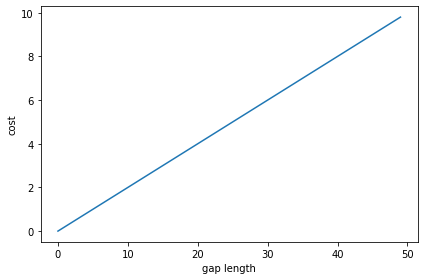

In [1]:
from vectorian.alignment import LinearGapCost, WatermanSmithBeyer

LinearGapCost(0.2)

In [3]:
#session.exponential_gap_costs(5)  # , 20)session.max_sentence_len

waterman_smith_beyer(gap=0.2, zero=0.5)

{'algorithm': 'wsb', 'gap': array([0.2], dtype=float32), 'zero': 0.5}

In [5]:
r = session.find(query, n=3, options={
    'alignment': WatermanSmithBeyer(gap=LinearGapCost(0.2), zero=0.5)
})

True